-Armando Aguilar Gómez

-José Andrés Fernández Marmolejo.

-Michael Azofeifa Torres



In [ ]:
  """
  Made Installations and imports
  """
!pip install torch
import numpy as np
import torch as torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numpy import linalg as LNG 

1. Sistemas lineales

  1.   Muestras para la linealidad

      a) g (t) = u(t) + 7

      b) g (t) = u(t) h(t)

      c) g (t) = máx (u(t))

      d) g (t) = Σu(i)

      e) g (t) = |u(t)|
      
      
    

In [ ]:
def Function_a(x):
  """
  Sample lineal function
  param x: input array
  return y: 5x
  """
  y = x + 7
  return y;

def Function_b(x):
  """
  Sample lineal function
  param x: input array
  return y: 5x
  """
  y = x * 5
  return y;

def Function_c(x):
  """
  Sample lineal function
  param x: input array
  return y: 5x
  """
  y = max(x)
  return y;

def Function_d(x):
  """
  Sample lineal function
  param x: input array
  return y: 5x
  """
  y=0
  y += x
  return y;

def Function_e(x):
  """
  Sample lineal function
  param x: input array
  return y: 5x
  """
  y = abs(x)
  return y;




def checkLinearity(operator):-Armando Aguilar Gómez
  
  x = torch.arange(-2.5, 2.5, 0.1)
  print("Function entry: ", x)
  
  #create series of values from -1 to 1, with step 0.01
  
  
  #samplescalars
  alpha = torch.randn(1,1);
  beta = torch.randn(1,1)
  #sample functions
  f1 = lambda x: x + 2
  f2 = lambda x: x * x
  
  #compute left and right side of the equation
  
  right = alpha * operator(f1(x)) + beta * operator(f2(x))
  left = operator(alpha * f1(x) + beta * f2(x))
  
  difference = torch.abs(right - left);
  
  
  sumDifference = difference.sum()
  #Is linear?
  return (sumDifference < 0.0001)
  

print("Function a) Linearity --> " + str(checkLinearity(Function_a)) + "\n\n*****************\n")
print("Function b) Linearity --> " + str(checkLinearity(Function_b)) + "\n\n*****************\n")
print("Function c) Linearity --> " + str(checkLinearity(Function_c)) + "\n\n*****************\n")
print("Function d) Linearity --> " + str(checkLinearity(Function_d)) + "\n\n*****************\n")
print("Function e) Linearity --> " + str(checkLinearity(Function_e)) + "\n\n*****************\n")

Function entry:  tensor([-2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e+00, -1.3000e+00, -1.2000e+00, -1.1000e+00,
        -1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -1.4901e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01,
         1.0000e+00,  1.1000e+00,  1.2000e+00,  1.3000e+00,  1.4000e+00,
         1.5000e+00,  1.6000e+00,  1.7000e+00,  1.8000e+00,  1.9000e+00,
         2.0000e+00,  2.1000e+00,  2.2000e+00,  2.3000e+00,  2.4000e+00])
Function a) Linearity --> tensor(False)

*****************

Function entry:  tensor([-2.5000e+00, -2.4000e+00, -2.3000e+00, -2.2000e+00, -2.1000e+00,
        -2.0000e+00, -1.9000e+00, -1.8000e+00, -1.7000e+00, -1.6000e+00,
        -1.5000e+00, -1.4000e

 
      2. Demostración homogeneidad absoluta y superposición de normas l_p



In [ ]:
def L1(x):
  l_1 = torch.sum(abs(x))
  return l_1


def L2(x):
  z = x**2
  l_2 = np.sqrt(torch.sum(z))
  return l_2

def LInf(x):
  z = x**10
  l_inf = pow(torch.sum(z), 1/10)
  return l_inf


def checkAbsoluteLinearity(operator, norm=str):
  print("************************ NORM " + norm + " ************************\n")
  
  x = torch.arange(0, 5., 0.1)
  print("Function entry: " + str(x))
  
  #create series of values from 0 to 5., with step 0.01
  
  
  #samplescalars
  alpha = torch.randn(1,1)
  #sample functions
  f1 = lambda x: x + 2
  f2 = lambda x: x * x
  
  #compute left and right side of the equation of Homogenity and Superposition condition
  
  #Homgenity
  right1 = abs(alpha) * operator(f1(x))
  left1 = operator(alpha * f1(x))

  #Superposition
  right2 = operator(f1(x)) + operator(f2(x))
  left2 = operator(f1(x) + f2(x))
  
  difference_homogenity = torch.abs(right1 - left1);
  difference_superposition = torch.abs(right2 - left2);
  
  
  sumDifference1 = difference_homogenity.sum()
  sumDifference2 = difference_superposition.sum()
  #Is linear?

  print("Check Homogenity condition --> " + str(sumDifference1 < 0.0001) + 
        "\nCheck Superposition condition --> " + str(sumDifference2 < 0.0001) + "\n\n")

  return 0


checkAbsoluteLinearity(L1, "L1")
checkAbsoluteLinearity(L2, "L2")
checkAbsoluteLinearity(LInf, "L_inf")

************************ NORM L1 ************************

Function entry: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
        4.5000, 4.6000, 4.7000, 4.8000, 4.9000])
Check Homogenity condition --> tensor(True)
Check Superposition condition --> tensor(True)


************************ NORM L2 ************************

Function entry: tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.40

0

  1. Plot & vector properties
    
    a) Grafico de los siguientes vectores 
    
     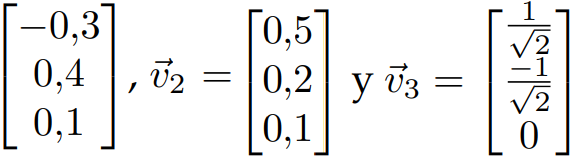
    


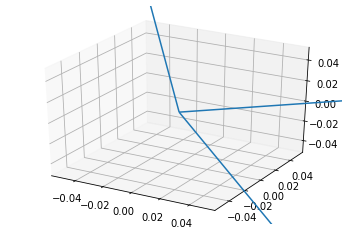

0

In [ ]:
  """
  the vectors are created
  """
v1 = [-0.3, 0.4, 0.1]
v2 = [0.5, 0.2, 0.1]
v3 = [1/np.square(2), -1/np.square(2), 0]
origin = [0,0,0]

def plotVector(v1, v2, v3, origin):
 X, Y, Z = zip(origin,origin,origin) 
 U, V, W = zip(v1,v2,v3)

 fig = plt.figure()
 ax = fig.add_subplot(111, projection='3d')
 ax.quiver(X,Y,Z,U,V,W,arrow_length_ratio=0.01)
 plt.show()

 return 0

plotVector(v1, v2, v3, origin)

c) Angulo en grados, entre los vectores 

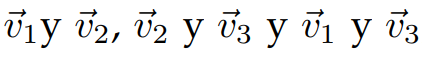

implementando la fórmula en Pytorch, sin usar las funciones
correspondientes de la biblioteca

In [ ]:
v1 = [-0.3, 0.4, 0.1]
v2 = [0.5, 0.2, 0.1]
v3 = [1/np.square(2), -1/np.square(2), 0]


def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    teta = np.arccos(np.dot(v1_u, v2_u)/(np.linalg.norm(v1_u)*np.linalg.norm(v2_u)))
    """ Returns the angle in grades
    """
    teta= np.degrees(teta)
    return teta

print("Angulo v1 y v2 ",angle_between(v1,v2))
print("Angulo v2 y v3 ",angle_between(v2,v3))
print("Angulo v1 y v3 ",angle_between(v1,v3))




    

Angulo v1 y v2  102.4058157512855
Angulo v2 y v3  67.21350200040284
Angulo v1 y v3  166.102113751986


d) Distancia en

 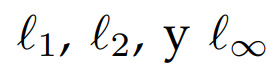
 
 entre los vectores 
 
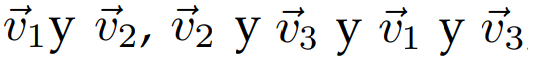 

implementando la fórmula en en Pytorch, sin usar las
funciones correspondientes de la biblioteca. Se compara el resultado
obtenido con el uso de la función torch.norm.


In [ ]:
v1 = [-0.3, 0.4, 0.1]
v2 = [0.5, 0.2, 0.1]
v3 = [1/np.sqrt(2), -1/np.sqrt(2), 0]

""" ---------------------------------------------      L1 Norm
"""

def L1(v1,v2):
  """
  function norm L1
  param v1: firts vector
  param v2: second vector
  """
  
  L1=0
  for i in range(0,len(v1)-1):
    L1+=abs(v2[i]-v1[i])
    

  return (L1)


""" ---------------------------------------------      L2 Norm
"""
def L2(v1,v2):
  """
  function norm L2
  param v1: firts vector
  param v2: second vector
  """
  L2=0
  for i in range(0,len(v1)-1):
    L2+=(v2[i]-v1[i])**2
    
  L2=np.sqrt(L2)

  return (L2)
        
"""-----------------------------------------       L-infinite Norm
"""
def Linfinite(v1,v2):
  Linf=0
  for i in range(0,len(v1)-1):
    Linf+=(v2[i]-v1[i])**50
    
  Linf=pow(Linf,1/50)

  return (Linf)

""" ---------------------------------------------      Distance
"""
def distance(v1,v2):
  ten1=torch.tensor(v1)
  ten2=torch.tensor(v2)

  dis=ten2-ten1

  return (dis)

""" ---------------------------------------------      checks
"""

def checkl1(p):
  #comprobar la norma l1
  checkl1= torch.norm(p,1)
  return checkl1

def checkl2(p):
  #comprobar la norma l2
  checkl2= torch.norm(p,2)
  return checkl2

def checklinf(p):
  #comprobar la norma linf
  checklinf= torch.norm(p,float('inf'))
  return checklinf

distance1= distance(v1,v2)
distance2= distance(v2,v3)
distance3= distance(v1,v3)

print("------------------ Conjunto 1 ---------------------")
print("Funcion L1          ",L1(v1,v2))
print("Funcion L2          ",L2(v1,v2))
print("Funcion Linfinite   ",Linfinite(v1,v2))
print("Funcion Distance    ",distance1)
print("Check L1            ",checkl1(distance1))
print("Check L2            ",checkl2(distance1))
print("Check L3            ",checklinf(distance1))
print("------------------ Conjunto 2 ---------------------")
print("Funcion L1          ",L1(v2,v3))
print("Funcion L2          ",L2(v2,v3))
print("Funcion Linfinite   ",Linfinite(v2,v3))
print("Funcion Distance    ",distance2)
print("Check L1            ",checkl1(distance2))
print("Check L2            ",checkl2(distance2))
print("Check L3            ",checklinf(distance2))
print("------------------ Conjunto 3 ---------------------")
print("Funcion L1          ",L1(v1,v3))
print("Funcion L2          ",L2(v1,v3))
print("Funcion Linfinite   ",Linfinite(v1,v3))
print("Funcion Distance    ",distance3)
print("Check L1            ",checkl1(distance3))
print("Check L2            ",checkl2(distance3))
print("Check L3            ",checklinf(distance3))

------------------ Conjunto 1 ---------------------
Funcion L1           1.0
Funcion L2           0.8246211251235323
Funcion Linfinite    0.8
Funcion Distance     tensor([ 0.8000, -0.2000,  0.0000])
Check L1             tensor(1.)
Check L2             tensor(0.8246)
Check L3             tensor(0.8000)
------------------ Conjunto 2 ---------------------
Funcion L1           1.1142135623730949
Funcion L2           0.930449316883016
Funcion Linfinite    0.9071067811865474
Funcion Distance     tensor([ 0.2071, -0.9071, -0.1000], dtype=torch.float64)
Check L1             tensor(1.2142, dtype=torch.float64)
Check L2             tensor(0.9358, dtype=torch.float64)
Check L3             tensor(0.9071, dtype=torch.float64)
------------------ Conjunto 3 ---------------------
Funcion L1           2.114213562373095
Funcion L2           1.4966460816309133
Funcion Linfinite    1.1073007155989298
Funcion Distance     tensor([ 1.0071, -1.1071, -0.1000], dtype=torch.float64)
Check L1             tensor(

2. Propiedades del producto punto:

a) Bilinearidad del producto punto

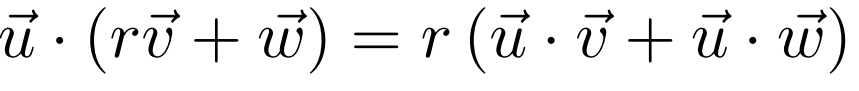



En la comprobacion r=8

In [ ]:
#r=8

"""
  creation of arrangements
"""
u = torch.arange(0.0, 5.0, 0.1)
v = torch.arange(0.0, 5.0, 0.1)
w = torch.arange(0.0, 5.0, 0.1)

u=torch.tensor(u)
v=torch.tensor(v)
w=torch.tensor(w)

def bilin(u, v, w):
  left1=u.dot(8*v+w)
  right1=8*(u.dot(v)+u.dot(w))

  print("Left side --> ", left1)
  print("Right side --> ", right1)

  return 0

bilin(u, v, w)

Left side -->  tensor(3638.2500)
Right side -->  tensor(6468.)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':


0

b) No asociatividad del producto punto 

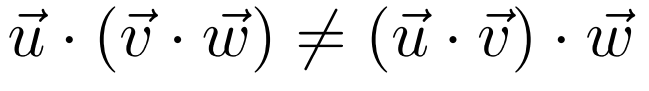

In [ ]:
def asoci(u, v, w):  
  left2=u*(v.dot(w))
  right2=u.dot(v)*w

  print("Left side --> ", left2)
  print("Right side --> ", right2)
  
  return 0

asoci(u, v, w)

Left side -->  tensor([   0.0000,   40.4250,   80.8500,  121.2750,  161.7000,  202.1250,
         242.5500,  282.9750,  323.4000,  363.8250,  404.2500,  444.6750,
         485.1000,  525.5250,  565.9500,  606.3750,  646.8000,  687.2250,
         727.6500,  768.0750,  808.5000,  848.9250,  889.3500,  929.7750,
         970.2000, 1010.6250, 1051.0500, 1091.4750, 1131.9000, 1172.3251,
        1212.7500, 1253.1750, 1293.6000, 1334.0250, 1374.4501, 1414.8750,
        1455.3000, 1495.7250, 1536.1500, 1576.5751, 1617.0000, 1657.4249,
        1697.8500, 1738.2750, 1778.7001, 1819.1250, 1859.5499, 1899.9750,
        1940.4000, 1980.8251])
Right side -->  tensor([   0.0000,   40.4250,   80.8500,  121.2750,  161.7000,  202.1250,
         242.5500,  282.9750,  323.4000,  363.8250,  404.2500,  444.6750,
         485.1000,  525.5250,  565.9500,  606.3750,  646.8000,  687.2250,
         727.6500,  768.0750,  808.5000,  848.9250,  889.3500,  929.7750,
         970.2000, 1010.6250, 1051.0500, 1091.4750

0

3.Funciones multivariable


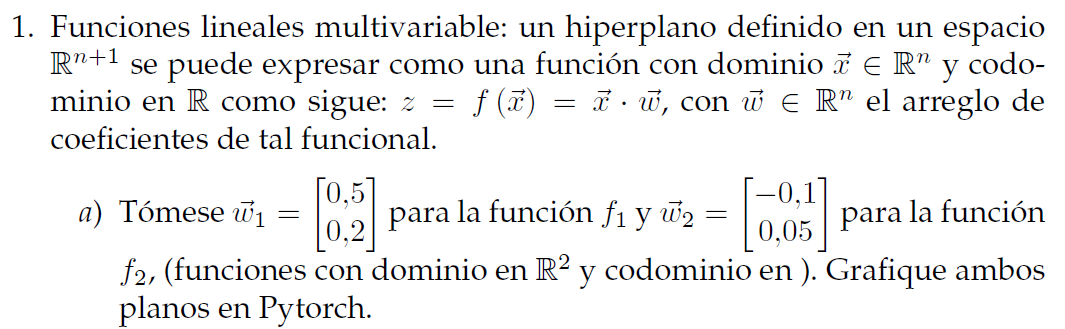

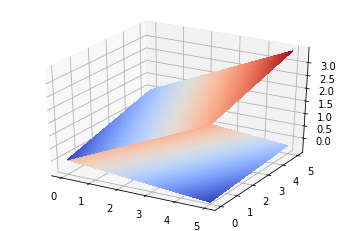

In [ ]:
figure = plt.figure()
figureSurface = figure.gca(projection = '3d')
#create 1D tensors
step = 0.01
x = torch.arange(0.0, 5.0, step)
y = torch.arange(0.0, 5.0,step)
#Create 2D tensors with variation along the two axis
X,Y = torch.meshgrid(x, y)
#compute hiperplane function
Z1 = 0.5* X + 0.2 * Y
Z2 = -0.1*X + 0.05 * Y
#create figure surface
surface = figureSurface.plot_surface(X.numpy(), Y.numpy(), Z1.numpy(), cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)

surface = figureSurface.plot_surface(X.numpy(), Y.numpy(), Z2.numpy(), cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)


2. El vector gradiente: Para cada una de las siguientes funciones multivariable:


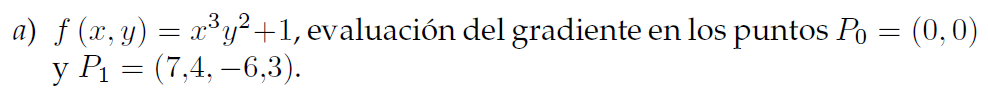

(1) grafique su superficie con dominio entre -10 y 10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  


[[29970.3125 19990.625 ]]
[[ 29226.5625  -19464.84375]]


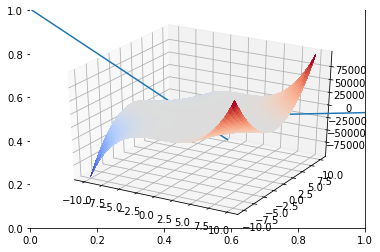

In [ ]:
figure, ax1 = plt.subplots()
figureSurface = figure.gca(projection = '3d')
#create 1D tensors
step = 0.01
x = torch.arange(-10, 10, step)
y = torch.arange(-10, 10,step)
#Create 2D tensors with variation along the two axis
X,Y = torch.meshgrid(x, y)
#compute hiperplane function
Z = X**3 * Y**2 + 1

#create figure surface
surface = figureSurface.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)

(dX, dY) = np.gradient(Z.numpy()) 
dX = dX / step
dY = dY / step

gradientVector = np.ones((1, 2))
gradientVector_unit = np.ones((1, 2))

#take the gradient vector at -10,10 in the gradient matrix
gradientVector[0, 0] = dX[0, 0]
gradientVector[0, 1] = dY[0, 0]
#gradient vector taken
print(gradientVector)



origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(0, 0, origin, gradientVector[:,0], gradientVector[:,1], origin, arrow_length_ratio=0.01)

gradientVector[0, 0] = dX[7, -6]
gradientVector[0, 1] = dY[7, -6]
#gradient vector taken
print(gradientVector)



origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(7, -6, origin, gradientVector[:,0], gradientVector[:,1], origin, arrow_length_ratio=0.01)

plt.show()

Punto 2) Se calcula el vector gradiente manuealmente, se evalúa y grafica el vector unitario en la dirección del gradiente para los dos puntos especificados.

Punto 3) Se calcula la magnitud de tal vector gradiente en cada punto

In [ ]:
magnitud = (np.sqrt(gradientVector[0, 0]**2 + gradientVector[0, 1]**2 ))
print(magnitud)

36025.6119897814


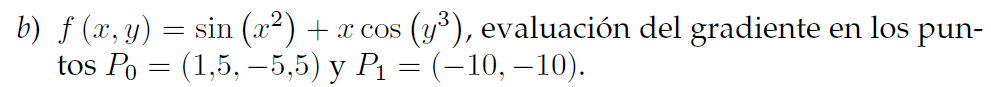

Punto 1) Se grafica la superficie con dominio entre -10 y 10

[[-16.90034866 -86.1410675 ]]
[[ -14.59549713 -167.5831604 ]]


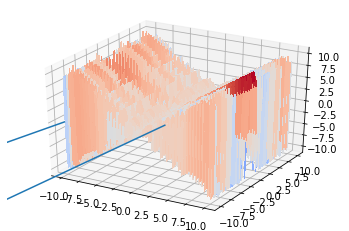

In [ ]:
figure = plt.figure()
figureSurface = figure.gca(projection = '3d')
#create 1D tensors
step = 0.01
x = torch.arange(-10, 10, step)
y = torch.arange(-10, 10,step)
#Create 2D tensors with variation along the two axis
X,Y = torch.meshgrid(x, y)
#compute hiperplane function
Z = torch.sin(X**2)+ X * torch.cos(y**3)

#create figure surface
surface = figureSurface.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)

(dX, dY) = np.gradient(Z.numpy()) 
dX = dX / step
dY = dY / step

gradientVector = np.ones((1, 2))
gradientVector_unit = np.ones((1, 2))

#take the gradient vector at -10,10 in the gradient matrix
gradientVector[0, 0] = dX[-10, -10]
gradientVector[0, 1] = dY[-10, -10]
#gradient vector taken
print(gradientVector)



origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(-10, -10, origin, gradientVector[:,0], gradientVector[:,1], origin, arrow_length_ratio=0.01)

gradientVector[0, 0] = dX[1, -5]
gradientVector[0, 1] = dY[1, -5]
#gradient vector taken
print(gradientVector)



origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(1, -5, origin, gradientVector[:,0], gradientVector[:,1], origin, arrow_length_ratio=0.01)

plt.show()

Punto 2) Se calcula el vector gradiente manuealmente, se evalúa y grafica el vector unitario en la dirección del gradiente para los dos puntos especificados.

Punto 3) Se calcula la magnitud de tal vector gradiente en cada punto

In [ ]:
magnitud = (np.sqrt(gradientVector[0, 0]**2 + gradientVector[0, 1]**2 ))
print(magnitud)

87.7832676103271


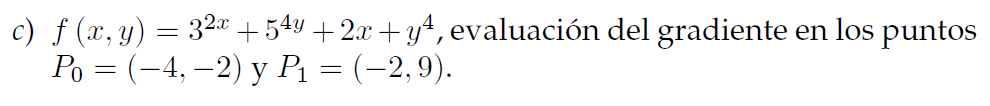

[[7.3322752e+09 0.0000000e+00]]
[[0.000000e+00 5.151172e+28]]


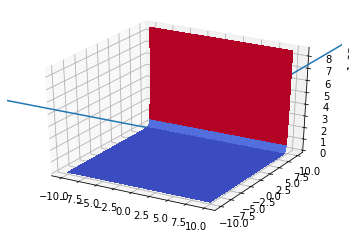

In [ ]:
figure = plt.figure()
figureSurface = figure.gca(projection = '3d')
#create 1D tensors
step = 0.01
x = torch.arange(-10, 10, step)
y = torch.arange(-10, 10,step)
#Create 2D tensors with variation along the two axis
X,Y = torch.meshgrid(x, y)
#compute hiperplane function
Z = pow(3,2*X)+pow(5,4*Y)+2*X+Y**4

#create figure surface
surface = figureSurface.plot_surface(X.numpy(), Y.numpy(), Z.numpy(), cmap = cm.coolwarm,
                       linewidth=0, antialiased=False)

(dX, dY) = np.gradient(Z.numpy()) 
dX = dX / step
dY = dY / step

gradientVector = np.ones((1, 2))
gradientVector_unit = np.ones((1, 2))

#take the gradient vector at -10,10 in the gradient matrix
gradientVector[0, 0] = dX[-2, 9]
gradientVector[0, 1] = dY[-2, 9]
#gradient vector taken
print(gradientVector)



origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(-2, 9, origin, gradientVector[:,0], gradientVector[:,1], origin, arrow_length_ratio=0.01)

gradientVector[0, 0] = dX[-4, -2]
gradientVector[0, 1] = dY[-4, -2]
#gradient vector taken
print(gradientVector)



origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(-4, -2, origin, gradientVector[:,0], gradientVector[:,1], origin, arrow_length_ratio=0.01)

plt.show()

Punto 2) Se calcula el vector gradiente manuealmente, se evalúa y grafica el vector unitario en la dirección del gradiente para los dos puntos especificados.

Punto 3) Se calcula la magnitud de tal vector gradiente en cada punto

In [ ]:
magnitud = (np.sqrt(gradientVector1[0, 0]**2 + gradientVector1[0, 1]**2 ))
print(magnitud)

7332275200.0


      4. La distancia de Minkowski como índice de error 

Para la Tabla 1

In [ ]:

t1 = [4.,6.,5.,6.,8.,10.,7.,4.,2.,8.]
t1 = torch.tensor(t1)

t2 = [2.,4.,3.,4.,6.,8.,5.,2.,4.,10.]
t2 = torch.tensor(t2)

def MAE(t1, t2):
  x=abs(t2-t1)
  print("Venctor resta",x)
  mae=0
  mae = (1/len(x))*(mae+torch.sum(x))
  print("STD_mae", torch.std(x))
  return mae


def RMSE(t1, t2):
  x = (t2-t1)**2
  print("Venctor cuadrado",x)
  mae=0
  mae = (1/len(x))*np.sqrt(mae+torch.sum(x))
  print("STD_rmse", torch.std(x))
  return mae

  

print("MAE", MAE(t1, t2))
print("RMSE", RMSE(t1,t2))

Para la Tabla 2

In [ ]:
t11 = [5.,3.,2.,4.,20.,32.,5.,4.,7.,41.]
t11 = torch.tensor(t11)

t22 = [4.,2.,3.,5.,21.,29.,2.,7.,4.,38.]
t22 = torch.tensor(t22)

def MAE(t1, t2):
  x=abs(t2-t1)
  print("Venctor resta",x)
  mae=0
  mae = (1/len(x))*(mae+torch.sum(x))
  print("STD_mae", torch.std(x))
  return mae


def RMSE(t1, t2):
  x = (t2-t1)**2
  print("Venctor cuadrado",x)
  mae=0
  mae = (1/len(x))*np.sqrt(mae+torch.sum(x))
  print("STD_rmse", torch.std(x))
  return mae

  

print("MAE", MAE(t11, t22))
print("RMSE", RMSE(t11,t22))

Para la Tabla 3.

In [ ]:
t111 = [6.,20.,31.,41.,50.,72.,73.,4.,7.,40.]
t111 = torch.tensor(t111)

t222 = [6.,20.,31.,41.,50.,62.,73.,4.,7.,20.]
t222 = torch.tensor(t222)

def MAE(t1, t2):
  x=abs(t2-t1)
  print("Venctor resta",x)
  mae=0
  mae = (1/len(x))*(mae+torch.sum(x))
  print("STD_mae", torch.std(x))
  return mae


def RMSE(t1, t2):
  x = (t2-t1)**2
  print("Venctor cuadrado",x)
  mae=0
  mae = (1/len(x))*np.sqrt(mae+torch.sum(x))
  print("STD_rmse", torch.std(x))
  return mae

  

print("MAE", MAE(t111, t222))
print("RMSE", RMSE(t111,t222))